In [ ]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
import numpy as np
tqdm.pandas()

# Load the data

In [ ]:
movies_df = data = pd.read_csv('./movies.dat', delimiter='::', header=None, names=['ID', 'Title', 'Genres'], encoding='latin1')
users_df = data = pd.read_csv('./users.dat', delimiter='::', header=None, names=['ID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], encoding='latin1')
ratings_df = data = pd.read_csv('./ratings.dat', delimiter='::', header=None, names=['UserId', 'MovieId', 'Rating', 'Timestamp' ], encoding='latin1')

<ipython-input-2-19b8ecb8e0cc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = data = pd.read_csv('./movies.dat', delimiter='::', header=None, names=['ID', 'Title', 'Genres'], encoding='latin1')
<ipython-input-2-19b8ecb8e0cc>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = data = pd.read_csv('./users.dat', delimiter='::', header=None, names=['ID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], encoding='latin1')
<ipython-input-2-19b8ecb8e0cc>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and diffe

In [ ]:
movies_df.head()

,ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
users_df.head()

,ID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
ratings_df.head()

,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# Merge Data

In [ ]:
user_ratings_df = pd.merge(users_df, ratings_df, left_on=['ID'], right_on=['UserId'], how='inner')
user_ratings_df.drop(columns=['ID'], inplace=True)
movie_user_rating_df = pd.merge(user_ratings_df, movies_df, left_on=['MovieId'], right_on=['ID'], how='inner')
movie_user_rating_df.drop(columns=['ID','UserId', 'MovieId'], inplace=True)

In [ ]:
movie_user_rating_df.head()

,Gender,Age,Occupation,Zip-Code,Rating,Timestamp,Title,Genres
0,F,1,10,48067,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,M,56,16,70072,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,M,25,12,32793,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,M,25,7,22903,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,M,50,1,95350,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


Text(0.5, 1.0, 'Distribution of timestamps')

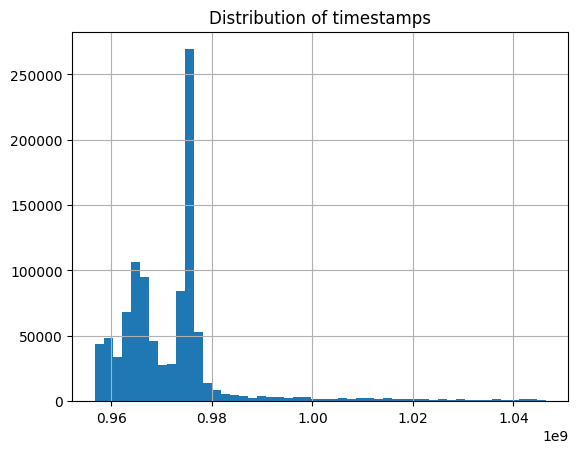

In [ ]:
movie_user_rating_df.Timestamp.hist(bins=50)
plt.title("Distribution of timestamps")

In [ ]:
movie_user_rating_df[movie_user_rating_df.Timestamp > 0.9757*1e9].shape[0]/movie_user_rating_df.shape[0]

0.20479819717679004

# Split Data

In [ ]:
y = movie_user_rating_df['Rating']
X = movie_user_rating_df.drop(columns=['Rating'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Age,Occupation,Zip-Code,Timestamp,Title,Genres
416292,M,18,6,19104,974942836,Remember the Titans (2000),Drama
683230,M,25,14,92104,997321489,Spawn (1997),Action|Adventure|Sci-Fi|Thriller
2434,M,25,20,95380,974713988,My Fair Lady (1964),Musical|Romance
688533,F,25,0,53589,960183537,Live and Let Die (1973),Action
472584,M,35,0,97225,965370901,Beetlejuice (1988),Comedy|Fantasy
...,...,...,...,...,...,...,...
259178,M,1,0,11803,974747653,Ghostbusters (1984),Comedy|Horror
365838,M,18,12,53188,966096744,Hamlet (1996),Drama
131932,F,25,17,48239,966614629,Con Air (1997),Action|Adventure|Thriller
671155,M,50,0,66048,971579005,"Man with the Golden Gun, The (1974)",Action


# Process Genres

In [ ]:
def split_genres(genres):
    return genres.split('|')

# Apply split_genres function to both train and test data
X_train['Genres'] = X_train['Genres'].apply(split_genres)
X_test['Genres'] = X_test['Genres'].apply(split_genres)

In [ ]:
X_train.head()

,Gender,Age,Occupation,Zip-Code,Timestamp,Title,Genres
416292,M,18,6,19104,974942836,Remember the Titans (2000),[Drama]
683230,M,25,14,92104,997321489,Spawn (1997),"[Action, Adventure, Sci-Fi, Thriller]"
2434,M,25,20,95380,974713988,My Fair Lady (1964),"[Musical, Romance]"
688533,F,25,0,53589,960183537,Live and Let Die (1973),[Action]
472584,M,35,0,97225,965370901,Beetlejuice (1988),"[Comedy, Fantasy]"


# Split Users and Movies, so that we can obtain the encoded representations of each.

## User Representation

Since all users are common in both train and test, in order to evaluate the autoencoder, we will further split these into a user train-*test*

In [ ]:
train_users, val_users = train_test_split(X_train[["Gender", "Age", "Occupation"]].drop_duplicates(), test_size=0.2, random_state=42)

In [ ]:
train_users.shape, val_users.shape

((192, 3), (49, 3))

In [ ]:
train_users.head()

,Gender,Age,Occupation
466065,M,35,10
897081,F,56,6
840495,M,35,13
975308,M,35,6
516274,F,56,7


Text(0.5, 1.0, 'Age distribution of users')

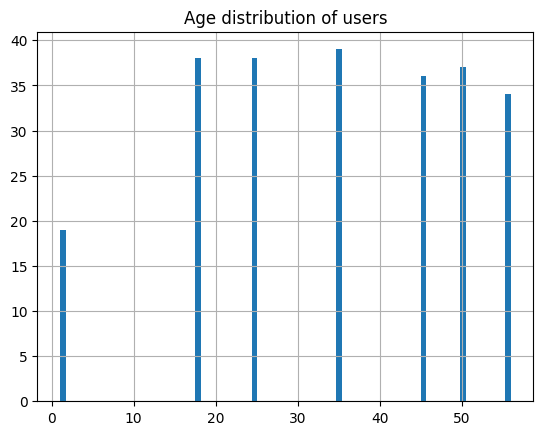

In [ ]:
X_train[["Gender", "Age", "Occupation"]].drop_duplicates().Age.hist(bins=80)
plt.title("Age distribution of users")

In [ ]:
user_enc = OneHotEncoder(handle_unknown='ignore')
user_enc.fit(train_users)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
user_enc.categories_

[array(['F', 'M'], dtype=object),
 array([ 1, 18, 25, 35, 45, 50, 56]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20])]

In [ ]:
user_enc.transform(train_users).toarray().shape

(192, 30)

In [ ]:
train_users_encoded = user_enc.transform(train_users)

In [ ]:
train_users_encoded

<192x30 sparse matrix of type '<class 'numpy.float64'>'
	with 576 stored elements in Compressed Sparse Row format>

In [ ]:
val_users_encoded = user_enc.transform(val_users)
val_users_encoded

<49x30 sparse matrix of type '<class 'numpy.float64'>'
	with 147 stored elements in Compressed Sparse Row format>

## Movie Representation

Since all users are common in both train and test, in order to evaluate the autoencoder, we will further split these into a movie train-test split

In [ ]:
train_movies, val_movies = train_test_split(X_train[["Title","Genres"]].drop_duplicates(["Title"]), test_size=0.2, random_state=42)
train_movies.shape, val_movies.shape

((2946, 2), (737, 2))

In [ ]:
train_movies.head()

,Title,Genres
734389,Brazil (1985),[Sci-Fi]
634029,Outrageous Fortune (1987),"[Comedy, Mystery]"
771690,Diner (1982),"[Comedy, Drama]"
954564,Striking Distance (1993),[Action]
999712,Tashunga (1995),"[Adventure, Western]"


In [ ]:
def process_movies(movies_df):
  # Exploding 'Genres' to make each genre a separate row
  df_exploded = movies_df.explode('Genres')

  # One-hot encoding
  one_hot = pd.get_dummies(df_exploded['Genres'], prefix='Genre')

  # Adding back the title to the one-hot encoded DataFrame
  one_hot['Title'] = df_exploded['Title']

  # Group by 'Title' and sum to combine the one-hot encoded genres for each movie
  df_one_hot = one_hot.groupby('Title').sum().reset_index()

  return df_one_hot

train_movies_encoded = process_movies(train_movies)
train_movies_encoded.head()

,Title,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,"$1,000,000 Duck (1971)",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,'Night Mother (1986),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,'Til There Was You (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,...And Justice for All (1979),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1-900 (1994),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
val_movies_encoded = process_movies(val_movies)

In [ ]:
print(train_movies_encoded.shape, val_movies_encoded.shape)

(2946, 19) (737, 19)


# Autoencoder

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.utils.data import DataLoader, TensorDataset


class AE(nn.Module):
    def __init__(self, input_columns):
        super(AE, self).__init__()
        self.fc1 = nn.Linear(input_columns, 10)
        self.fc2 = nn.Linear(10, input_columns)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x


    def encode(self, x):
        encoded_x = self.activation(self.fc1(x))
        return encoded_x


## User Encoding

In [ ]:
user_ae = AE(input_columns=train_users_encoded.shape[1])
user_criterion = nn.MSELoss()
user_optimizer = optim.RMSprop(user_ae.parameters(), lr=0.01)
# encoded_representation = ae.encode(your_input_tensor_here)

In [ ]:
train_users_encoded_tensor = torch.tensor(train_users_encoded.toarray(), dtype=torch.float32)
dataset = TensorDataset(train_users_encoded_tensor, train_users_encoded_tensor) # input and target are the same for autoencoders
dataloader = DataLoader(dataset, batch_size=64, shuffle=True) # Adjust batch_size as needed

validation_users_encoded_tensor = torch.tensor(val_users_encoded.toarray(), dtype=torch.float32)
validation_dataset = TensorDataset(validation_users_encoded_tensor, validation_users_encoded_tensor) # input and target are the same for autoencoders
validation_dataloader = DataLoader(validation_dataset, batch_size=64, shuffle=True) # Adjust batch_size as needed


Epoch [1/100], Training Loss: 0.1663, Validation Loss: 0.0761
Epoch [2/100], Training Loss: 0.0745, Validation Loss: 0.0731
Epoch [3/100], Training Loss: 0.0716, Validation Loss: 0.0709
Epoch [4/100], Training Loss: 0.0706, Validation Loss: 0.0695
Epoch [5/100], Training Loss: 0.0674, Validation Loss: 0.0663
Epoch [6/100], Training Loss: 0.0654, Validation Loss: 0.0657
Epoch [7/100], Training Loss: 0.0641, Validation Loss: 0.0631
Epoch [8/100], Training Loss: 0.0616, Validation Loss: 0.0611
Epoch [9/100], Training Loss: 0.0596, Validation Loss: 0.0589
Epoch [10/100], Training Loss: 0.0575, Validation Loss: 0.0569
Epoch [11/100], Training Loss: 0.0551, Validation Loss: 0.0555
Epoch [12/100], Training Loss: 0.0535, Validation Loss: 0.0528
Epoch [13/100], Training Loss: 0.0511, Validation Loss: 0.0518
Epoch [14/100], Training Loss: 0.0491, Validation Loss: 0.0492
Epoch [15/100], Training Loss: 0.0468, Validation Loss: 0.0477
Epoch [16/100], Training Loss: 0.0451, Validation Loss: 0.0460
E

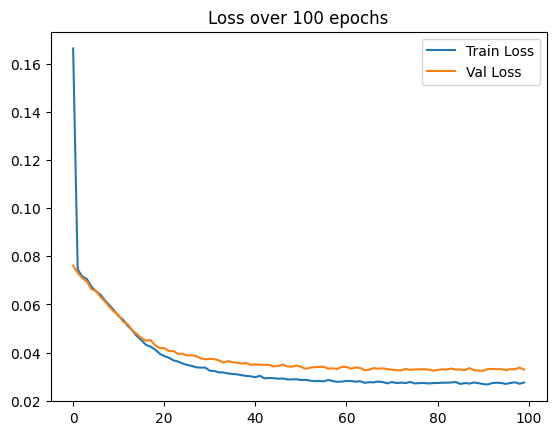

In [ ]:
nb_epochs = 100  # Number of epochs
device = torch.device("cuda")
user_ae = user_ae.to(device)
train_losses = []
val_losses = []
for epoch in range(1, nb_epochs + 1):
    train_loss = 0.0  # To accumulate losses for reporting
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)  # If using GPU

        # Zero the parameter gradients
        user_optimizer.zero_grad()

        # Forward pass
        outputs = user_ae(inputs)

        # Compute the loss
        loss = user_criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        user_optimizer.step()

        train_loss += loss.item()

    # Compute average loss for the epoch
    avg_train_loss = train_loss / len(dataloader)
    train_losses.append(avg_train_loss)

    user_ae.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No gradient computation in this block
        val_loss = 0.0
        for inputs, targets in validation_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = user_ae(inputs)
            loss = user_criterion(outputs, targets)

            val_loss += loss.item()

    avg_val_loss = val_loss / len(validation_dataloader)
    val_losses.append(avg_val_loss)

    print(f'Epoch [{epoch}/{nb_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')
plt.plot(train_losses, label = "Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title(f"Loss over {nb_epochs} epochs")
plt.legend()
plt.show()


In [ ]:
train_users_encoded_tensor[:5]

tensor([[0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
user_ae.forward(train_users_encoded_tensor[:5].to(device))

tensor([[-6.5752e-02,  9.8328e-01,  9.0401e-02,  1.0906e-01, -7.4190e-03,
          9.7973e-01, -9.2315e-02, -3.4790e-02, -1.1026e-01,  9.9347e-02,
          1.2245e-01,  1.0797e-01,  3.8981e-02, -3.4025e-03,  2.1844e-02,
          4.0196e-02, -6.1370e-02,  2.0597e-02,  1.1057e-01,  1.2862e-01,
         -2.2533e-02,  3.7363e-02,  4.7589e-02,  9.8718e-02, -1.8379e-02,
          1.1118e-01, -8.0816e-02,  2.0200e-02,  6.9748e-03,  4.9260e-02],
        [ 9.7878e-01,  7.9155e-03, -9.6195e-02,  1.7830e-02,  3.8492e-02,
          1.2154e-02,  5.8959e-02,  7.2085e-02,  8.8573e-01,  2.1370e-01,
         -9.0525e-02, -4.4376e-02,  5.2548e-02, -3.1021e-02,  1.2064e-01,
          1.7307e-01,  8.4599e-02,  4.7035e-02,  9.5418e-02, -2.4150e-02,
          1.1051e-01, -9.0290e-02,  3.0578e-02,  2.3936e-01,  1.5666e-01,
          1.1225e-01, -1.4654e-01, -5.7572e-03,  7.9538e-04, -1.7138e-02],
        [-4.1025e-02,  9.8917e-01,  8.4111e-02,  3.4395e-02, -7.1516e-02,
          9.6235e-01,  5.9983e-03, -

## Movie Encoding

In [ ]:
train_movies_encoded = process_movies(train_movies)
train_movies_encoded = train_movies_encoded.values
train_movies_encoded = train_movies_encoded[:,1:].astype(int) # Remove movie name

val_movies_encoded = process_movies(val_movies)
val_movies_encoded = val_movies_encoded.values
val_movies_encoded = val_movies_encoded[:,1:].astype(int) # Remove movie name

movie_ae = AE(input_columns=train_movies_encoded.shape[1])
movie_criterion = nn.MSELoss()
movie_optimizer = optim.RMSprop(movie_ae.parameters(), lr=0.001)
# encoded_representation = ae.encode(your_input_tensor_here)

In [ ]:
train_movies_encoded_tensor = torch.tensor(train_movies_encoded, dtype=torch.float32)
dataset = TensorDataset(train_movies_encoded_tensor, train_movies_encoded_tensor) # input and target are the same for autoencoders
dataloader = DataLoader(dataset, batch_size=64, shuffle=True) # Adjust batch_size as needed

val_movies_encoded_tensor = torch.tensor(val_movies_encoded, dtype=torch.float32)
validation_dataset = TensorDataset(val_movies_encoded_tensor, val_movies_encoded_tensor) # input and target are the same for autoencoders
validation_dataloader = DataLoader(validation_dataset, batch_size=64, shuffle=True) # Adjust batch_size as needed

Epoch [1/100], Training Loss: 0.0814 Validation Loss: 0.0707
Epoch [2/100], Training Loss: 0.0692 Validation Loss: 0.0673
Epoch [3/100], Training Loss: 0.0649 Validation Loss: 0.0638
Epoch [4/100], Training Loss: 0.0623 Validation Loss: 0.0608
Epoch [5/100], Training Loss: 0.0595 Validation Loss: 0.0582
Epoch [6/100], Training Loss: 0.0571 Validation Loss: 0.0553
Epoch [7/100], Training Loss: 0.0536 Validation Loss: 0.0523
Epoch [8/100], Training Loss: 0.0500 Validation Loss: 0.0478
Epoch [9/100], Training Loss: 0.0470 Validation Loss: 0.0448
Epoch [10/100], Training Loss: 0.0435 Validation Loss: 0.0421
Epoch [11/100], Training Loss: 0.0403 Validation Loss: 0.0386
Epoch [12/100], Training Loss: 0.0374 Validation Loss: 0.0358
Epoch [13/100], Training Loss: 0.0352 Validation Loss: 0.0333
Epoch [14/100], Training Loss: 0.0323 Validation Loss: 0.0307
Epoch [15/100], Training Loss: 0.0309 Validation Loss: 0.0284
Epoch [16/100], Training Loss: 0.0278 Validation Loss: 0.0262
Epoch [17/100], T

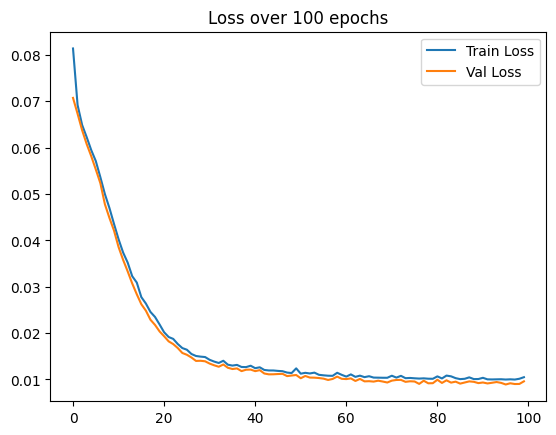

In [ ]:
nb_epochs = 100  # Number of epochs
device = torch.device("cuda")
movie_ae = movie_ae.to(device)

train_losses = []
val_losses = []

for epoch in range(1, nb_epochs + 1):
    train_loss = 0.0  # To accumulate losses for reporting
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)  # If using GPU

        # Zero the parameter gradients
        movie_optimizer.zero_grad()

        # Forward pass
        outputs = movie_ae(inputs)

        # Compute the loss
        loss = movie_criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        movie_optimizer.step()

        train_loss += loss.item()

    # Compute average loss for the epoch
    avg_train_loss = train_loss / len(dataloader)
    train_losses.append(avg_train_loss)

    with torch.no_grad():  # No gradient computation in this block
        val_loss = 0.0
        for inputs, targets in validation_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = movie_ae(inputs)
            loss = movie_criterion(outputs, targets)

            val_loss += loss.item()

    avg_val_loss = val_loss / len(validation_dataloader)
    val_losses.append(avg_val_loss)

    print(f'Epoch [{epoch}/{nb_epochs}], Training Loss: {avg_train_loss:.4f} Validation Loss: {avg_val_loss:.4f}')
plt.plot(train_losses, label = "Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title(f"Loss over {nb_epochs} epochs")
plt.legend()
plt.show()


In [ ]:
train_movies_encoded_tensor[:5].to(device)

tensor([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]],
       device='cuda:0')

In [ ]:
movie_ae.encode(train_movies_encoded_tensor[:5].to(device))

tensor([[0.2256, 0.8025, 0.5796, 0.6519, 0.2691, 0.5086, 0.4297, 0.3170, 0.4558,
         0.7963],
        [0.5860, 0.4924, 0.4861, 0.2371, 0.5836, 0.5589, 0.7478, 0.5380, 0.3662,
         0.5942],
        [0.6350, 0.3896, 0.2168, 0.2911, 0.5957, 0.5064, 0.5361, 0.7495, 0.6274,
         0.7043],
        [0.8189, 0.4037, 0.7433, 0.3871, 0.7169, 0.6701, 0.5325, 0.5118, 0.2773,
         0.7166],
        [0.4749, 0.2906, 0.1762, 0.4029, 0.3657, 0.2166, 0.2675, 0.5203, 0.5856,
         0.4726]], device='cuda:0', grad_fn=<SigmoidBackward0>)

# Passing these representations into a RF model

In [ ]:
def apply_autoencoder_encoding(row):
  print(row[["Gender", "Age", "Occupation"]])
  display(pd.DataFrame(row[["Gender", "Age", "Occupation"]]))
  encoded_user = user_enc.transform(pd.DataFrame(row[["Gender", "Age", "Occupation"]]))
  print(encoded_user)
  autoencoded_user = user_ae.encode(torch.tensor(encoded_user.toarray(), dtype=torch.float32).to(device))
  row["autoencoded"] = autoencoded_user

## Get Users

In [ ]:
users = X[["Gender", "Age", "Occupation"]].drop_duplicates()
users_encoded = user_enc.transform(users)
users_auto_encoded_tensor = user_ae.encode(torch.tensor(users_encoded.toarray(), dtype=torch.float32).to(device))
users_auto_encoded_tensor.shape

torch.Size([241, 10])

In [ ]:
users_auto_encoded_tensor[:5]

tensor([[0.1346, 0.6326, 0.1498, 0.2676, 0.1473, 0.3328, 0.4653, 0.4663, 0.6479,
         0.1106],
        [0.7581, 0.2891, 0.7273, 0.2002, 0.2235, 0.2936, 0.1598, 0.1805, 0.1607,
         0.2039],
        [0.1794, 0.5372, 0.8757, 0.4425, 0.7515, 0.2902, 0.1926, 0.2472, 0.4411,
         0.5903],
        [0.1681, 0.3795, 0.9280, 0.6365, 0.4401, 0.4729, 0.3304, 0.2226, 0.7095,
         0.5439],
        [0.2320, 0.6441, 0.5424, 0.1809, 0.1033, 0.4433, 0.2651, 0.2271, 0.1292,
         0.8320]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
users["autoencoded"] = None

temp = users_auto_encoded_tensor.to("cpu").detach().numpy()

for i in range(len(users)):
  users['autoencoded'].iloc[i] = temp[i]

<ipython-input-44-2abc04abce6d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['autoencoded'].iloc[i] = temp[i]


In [ ]:
users

,Gender,Age,Occupation,autoencoded
0,F,1,10,"[0.1346149, 0.6325595, 0.1498307, 0.26755834, ..."
1,M,56,16,"[0.75812113, 0.28908423, 0.72728217, 0.2002212..."
2,M,25,12,"[0.17944226, 0.5372094, 0.8756683, 0.44248158,..."
3,M,25,7,"[0.16807796, 0.37949783, 0.9280492, 0.6365387,..."
4,M,50,1,"[0.23203577, 0.6441142, 0.5423729, 0.1809112, ..."
...,...,...,...,...
25373,F,56,8,"[0.737014, 0.5458748, 0.49806854, 0.7862092, 0..."
26778,M,56,5,"[0.8463457, 0.41121015, 0.8350698, 0.5279331, ..."
44665,M,1,13,"[0.2958351, 0.60083497, 0.51875246, 0.10716646..."
45714,M,18,9,"[0.22949395, 0.107090086, 0.59358644, 0.095636..."


## Get Movies

In [ ]:
X["Genres"] = X["Genres"].apply(split_genres)

In [ ]:
movies = process_movies(X[["Title", "Genres"]].drop_duplicates("Title"))
movies_encoded = movies.values
movies_encoded = movies_encoded[:,1:].astype(int) # Remove movie name
movies_encoded_tensor = torch.tensor(movies_encoded, dtype=torch.float32)
movies_encoded_tensor.shape

torch.Size([3706, 18])

In [ ]:
movies_encoded_tensor[:5]

tensor([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [ ]:
movie_representation_ae = movie_ae.encode(movies_encoded_tensor.to(device))
movie_representation_ae.shape

torch.Size([3706, 10])

In [ ]:
movie_representation_ae[:5]

tensor([[0.2256, 0.8025, 0.5796, 0.6519, 0.2691, 0.5086, 0.4297, 0.3170, 0.4558,
         0.7963],
        [0.5860, 0.4924, 0.4861, 0.2371, 0.5836, 0.5589, 0.7478, 0.5380, 0.3662,
         0.5942],
        [0.6350, 0.3896, 0.2168, 0.2911, 0.5957, 0.5064, 0.5361, 0.7495, 0.6274,
         0.7043],
        [0.3515, 0.7349, 0.7036, 0.4764, 0.2808, 0.2155, 0.4663, 0.4724, 0.4553,
         0.5926],
        [0.8189, 0.4037, 0.7433, 0.3871, 0.7169, 0.6701, 0.5325, 0.5118, 0.2773,
         0.7166]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
movies["autoencoded"] = None
temp = movie_representation_ae.to("cpu").detach().numpy()
for i in range(len(movies)):
  movies['autoencoded'].iloc[i] = temp[i]

<ipython-input-51-9e634882e156>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['autoencoded'].iloc[i] = temp[i]


In [ ]:
movies.head()

,Title,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,autoencoded
0,"$1,000,000 Duck (1971)",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0.2256071, 0.8025163, 0.57962704, 0.65193397,..."
1,'Night Mother (1986),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[0.5859648, 0.49236885, 0.48608994, 0.23706989..."
2,'Til There Was You (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,"[0.63504046, 0.3895587, 0.21677554, 0.29109052..."
3,"'burbs, The (1989)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0.35147232, 0.73493123, 0.7036335, 0.47636336..."
4,...And Justice for All (1979),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,"[0.81886816, 0.40369686, 0.7433236, 0.38711298..."


## Combined df

In [ ]:
def combine_add_ae_representations(df, movies, users):
  '''
  Ensure that movies and users already have their autoencoded representations before calling this function.
  This function only merges them all together and organizes columns.
  It does not create the representations.
  '''
  df_with_ae_movies = df.merge(movies[["Title", "autoencoded"]], on="Title")
  df_with_ae_movies.rename(columns={"autoencoded": "movies_autoencoded"}, inplace=True)
  df_with_ae_movies_and_ae_users = df_with_ae_movies.merge(users, on=["Gender", "Age", "Occupation"])
  df_with_ae_movies_and_ae_users.rename(columns={"autoencoded": "users_autoencoded"}, inplace=True)
  return df_with_ae_movies_and_ae_users

In [ ]:
X_train_with_ae = combine_add_ae_representations(X_train, movies, users)
X_test_with_ae = combine_add_ae_representations(X_test, movies, users)

In [ ]:
X_train.shape, X_train_with_ae.shape, X_test.shape, X_test_with_ae.shape

((800167, 7), (800167, 9), (200042, 7), (200042, 9))

# IMP: SAVE TO FILE BEFORE RUNNING MODEL

In [ ]:
X_train_with_ae.to_pickle("X_train_with_ae.pkl")
X_test_with_ae.to_pickle("X_test_with_ae.pkl")
y_train.to_pickle("y_train.pkl")
y_test.to_pickle("y_test.pkl")

In [ ]:
temp = pd.read_pickle("X_train_with_ae.pkl")

## RF Model

In [ ]:
X_train_with_ae_data = np.concatenate((np.vstack(X_train_with_ae["movies_autoencoded"]), np.vstack(X_train_with_ae["users_autoencoded"])), axis=1)

In [ ]:
X_test_with_ae_data = np.concatenate((np.vstack(X_test_with_ae["movies_autoencoded"]), np.vstack(X_test_with_ae["users_autoencoded"])), axis=1)

In [ ]:
X_train_mini = X_train_with_ae_data[:100]
y_train_mini = y_train[:100]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( random_state = 0)
rf.fit(X_train_mini, y_train_mini)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = rf.predict(X_test_with_ae_data)

# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1.3608187534194647
R² Score: -0.08853023088005885
